<a href="https://colab.research.google.com/github/pavan-kalam/PDS/blob/main/ICP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

Importing the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data Exploration:

In [4]:
class_counts= data['Loan_Status'].value_counts()
class_counts

,count
Loan_Status,
Y,422
N,192


Frequency Table for Class distribution
Loan_Status
N    192
Y    422
Name: count, dtype: int64


<Axes: xlabel='Loan_Status'>

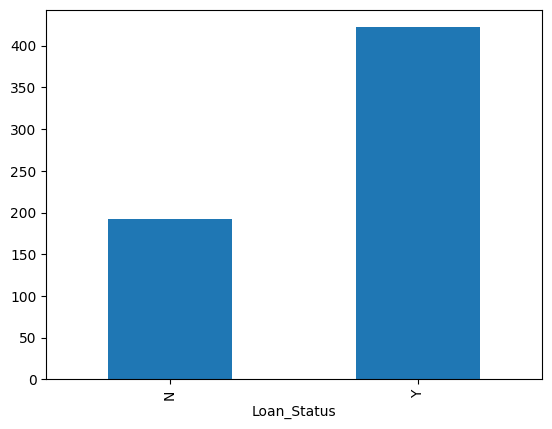

In [5]:
classDist = data['Loan_Status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar')

In [6]:
data['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


Frequency Table for Gender
Gender
Female    112
Male      489
Name: count, dtype: int64


<Axes: xlabel='Gender'>

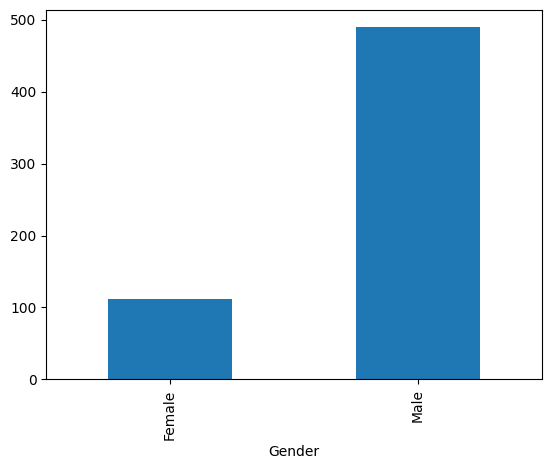

In [7]:
genderDist = data['Gender'].value_counts(ascending=True)
print ('Frequency Table for Gender')
print(genderDist)
genderDist.plot(kind='bar')

Lets look at the portion of male and female from the the self employment is either Yes or No.

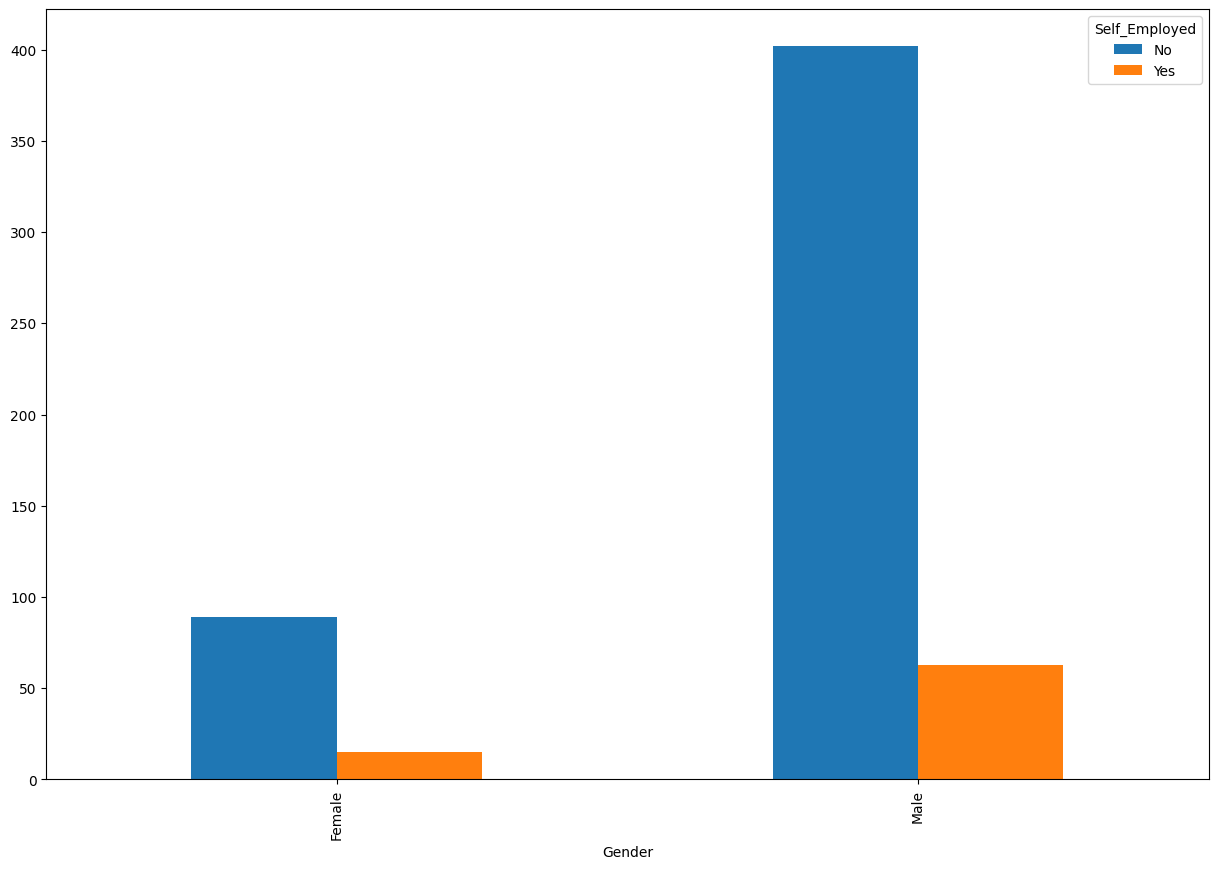

In [8]:
res = data.groupby(['Gender', 'Self_Employed']).size().unstack()
res.plot(kind='bar', figsize=(15,10))
plt.show()

Here we observe that the distribution is not fair becuase there are more males with Loan_status as Yes than females.

Next lets see the relation of ApplicantIncome with Gender.

In [9]:
# Create a new column to categorize 'ApplicantIncome' into ranges
bins = [0, 2500, 5000, 10000, 20000, data['ApplicantIncome'].max()]  # Define ranges
labels = ['Low', 'Moderate', 'High', 'Very High', 'Extremely High']  # Labels for the ranges
data['IncomeRange'] = pd.cut(data['ApplicantIncome'], bins=bins, labels=labels)

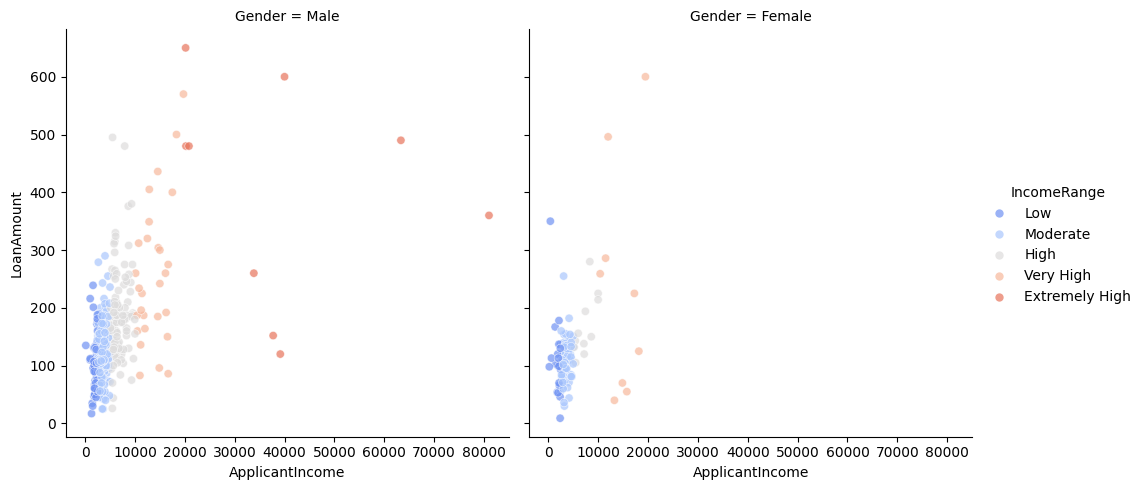

In [10]:
# Plot the data using different colors based on 'IncomeRange'
sns.relplot(
    x="ApplicantIncome",
    y="LoanAmount",
    data=data,
    col="Gender",
    hue="IncomeRange",  # Use 'IncomeRange' to color points based on range
    palette="coolwarm",  # You can choose any palette or customize
    alpha=0.7  # Slightly increase transparency for better clarity
)

# Display the plot
plt.show()

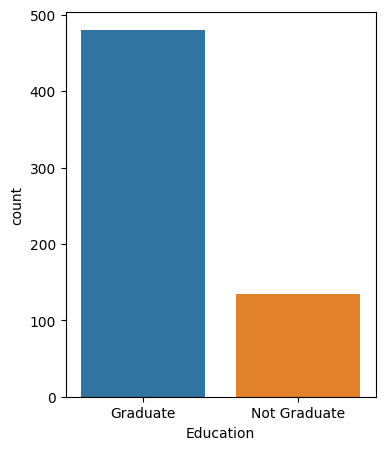

In [11]:
fig,ax=plt.subplots(figsize=(4,5))
sns.countplot(x = "Education", data=data, order = data["Education"].value_counts().index, hue="Education")
plt.show()

Here we can see that there are more graduate people than non-graduate.

Now lets take a look at the Married column

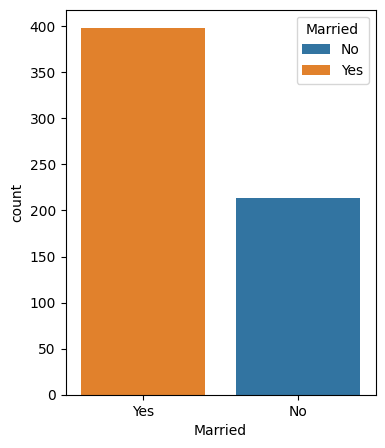

In [12]:
fig,ax=plt.subplots(figsize=(4,5))
sns.countplot(x = "Married", data=data, order = data["Married"].value_counts().index, hue='Married')
plt.show()

Here from the above we can clearly identify the imbalance in the data.

### **To solve data imbalance issue, here we are using "SMOTE"  to balance the dataset, and here we are using 'imblearn' library in python**

Now Checking the missing values in the data

In [13]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


**Case-1: Selecting one pair of attributes.**

---



Now we will select a pair of attributes and the target variable

Here in this case we are using 'ApplicantIncome' and CoapplicantIncome' as features and 'Loan_Status' as target.

In [14]:
X = data[['ApplicantIncome', 'CoapplicantIncome']]  # Features
y = data['Loan_Status']  # Target (imbalanced)

Now we will perform the data cleaning to the target variable to numerical, because it is categorical.

In [15]:
y = y.map({'Y': 1, 'N': 0})  # Convert 'Y' and 'N' to 1 and 0

Handling the missing values, but here in this case it is optional because the selected two attributes have no missing values,

In [16]:

# Handle missing values (optional: depending on your dataset)
X.fillna(X.mean(), inplace=True)

<ipython-input-16-5ed70ff9025d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Now we will apply SMOTE to oversample the minority class (i.e., to balance the dataset)

In [17]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())

# Now dataset is now balanced.

Class distribution before SMOTE: Loan_Status
1    422
0    192
Name: count, dtype: int64
Class distribution after SMOTE: Loan_Status
1    422
0    422
Name: count, dtype: int64


**Visualization**:Comparing the dataset before and after the SMOTE (for the above attributes pair)

Class distribution before SMOTE: Loan_Status
1    422
0    192
Name: count, dtype: int64


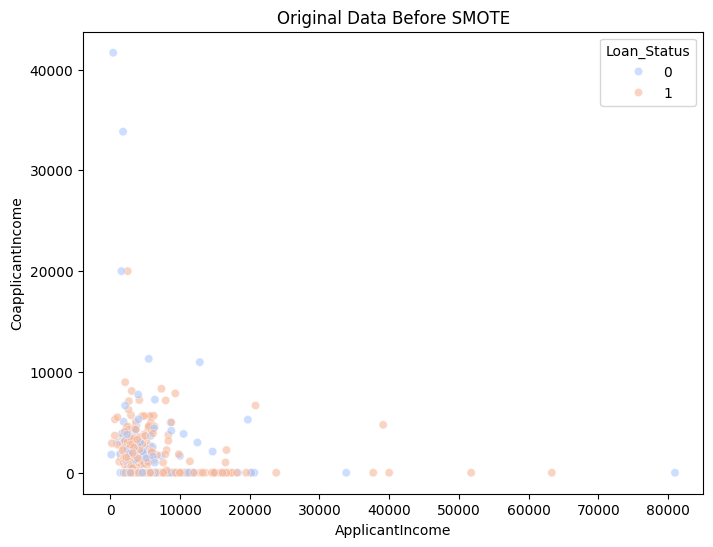

In [18]:
# Plot original dataset (before SMOTE)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', hue=y, data=data, palette='coolwarm', alpha=0.6)
print("Class distribution before SMOTE:", y.value_counts())
plt.title("Original Data Before SMOTE")
plt.show()



Note: From above and below graphs, 'red' represents 'Loan Approved' and 'blue' represents 'Loan Rejected'.

Class distribution after SMOTE: Loan_Status
1    422
0    422
Name: count, dtype: int64


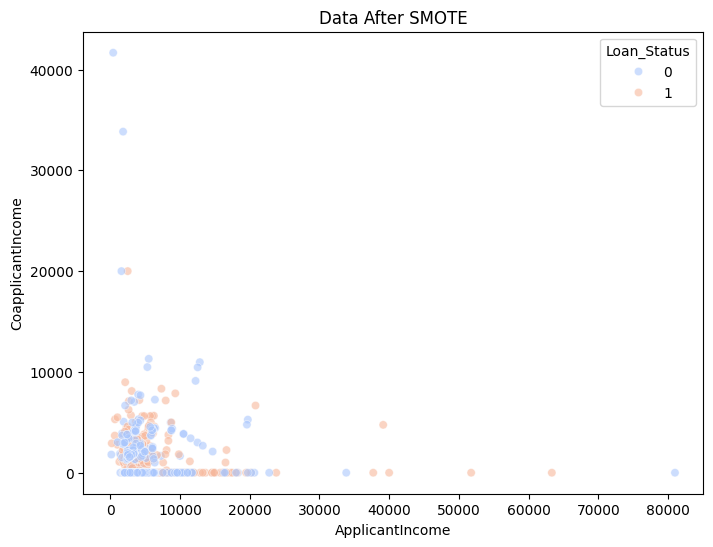

In [19]:
# Convert the resampled data (X_resampled) back to a pandas DataFrame
X_resampled_data = pd.DataFrame(X_resampled, columns=['ApplicantIncome', 'CoapplicantIncome'])

# Plot resampled dataset (after SMOTE)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', hue=y_resampled, data=X_resampled_data, palette='coolwarm', alpha=0.6)
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())
plt.title("Data After SMOTE")
plt.show()

### Case-2: Selecting another pair of attributes

---



Now we will select another pair of attributes and the target variable

Here in this case we are using 'Credit_History' and 'LoanAmount' as features and 'Loan_Status' as target.

In [20]:
X1 = data[['Credit_History', 'LoanAmount']]  # New pair of attributes
y1 = data['Loan_Status']  # Target (imbalanced)

As data in the target variable is categorical, we are going to change it to numerical by performing data cleaning to the target variable.

In [21]:
y1 = y1.map({'Y': 1, 'N': 0})  # Convert 'Y' and 'N' to 1 and 0

Now Handling the missing values,here in this case it is mandate because the selected two attributes have missing values,

In [22]:
X1.fillna(X1.mean(), inplace=True)

<ipython-input-22-ac9663d5ec58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(X1.mean(), inplace=True)


Now we will apply SMOTE to balance the dataset

In [23]:
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

# Checking the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y1.value_counts())
print("Class distribution after SMOTE:", pd.Series(y1_resampled).value_counts())


Class distribution before SMOTE: Loan_Status
1    422
0    192
Name: count, dtype: int64
Class distribution after SMOTE: Loan_Status
1    422
0    422
Name: count, dtype: int64


**Visualization:** Now comparing the dataset before and after the SMOTE (for the other two attributes pair)

Class distribution before SMOTE: Loan_Status
1    422
0    192
Name: count, dtype: int64


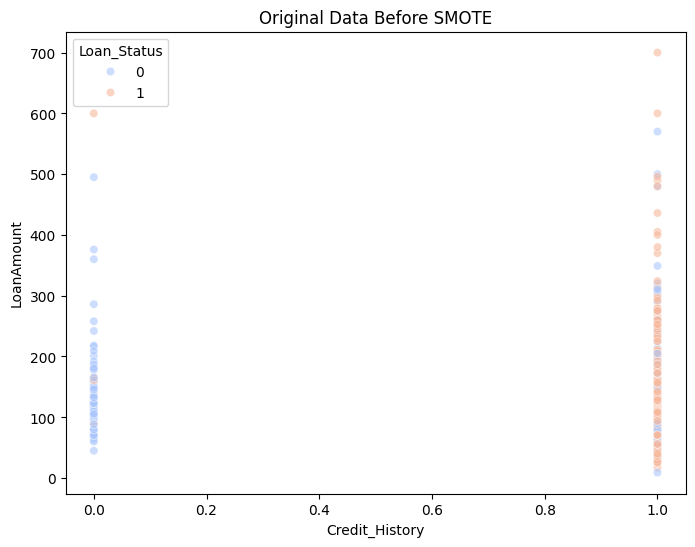

In [24]:
# Plot original dataset (before SMOTE)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit_History', y='LoanAmount', hue=y, data=data, palette='coolwarm', alpha=0.6)
print("Class distribution before SMOTE:", y1.value_counts())
plt.title("Original Data Before SMOTE")
plt.show()

Class distribution after SMOTE: Loan_Status
1    422
0    422
Name: count, dtype: int64


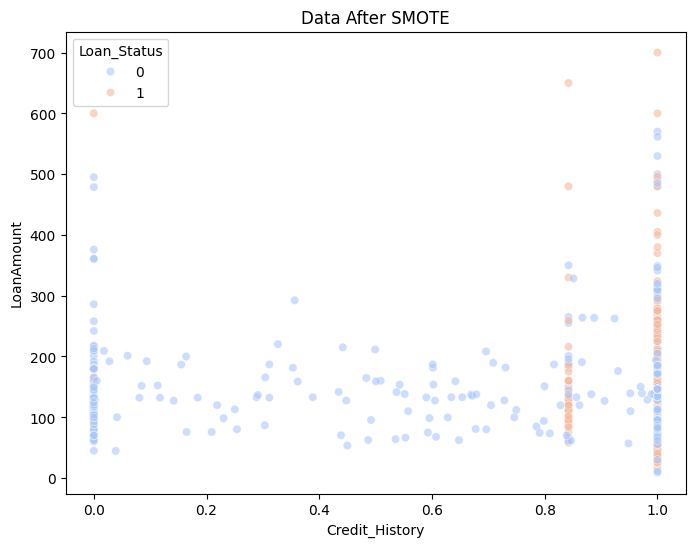

In [25]:
# Convert the resampled data (X_resampled) back to a pandas DataFrame
X1_resampled_data = pd.DataFrame(X1_resampled, columns=['Credit_History', 'LoanAmount'])

# Plot resampled dataset (after SMOTE)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit_History', y='LoanAmount', hue=y_resampled, data=X1_resampled_data, palette='coolwarm', alpha=0.6)

print("Class distribution after SMOTE:", pd.Series(y1_resampled).value_counts())
plt.title("Data After SMOTE")
plt.show()